1.	К алгоритму kNN, реализованному в лекции, реализуйте добавление весов соседей по любому из показанных на лекции принципов.
Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [17]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

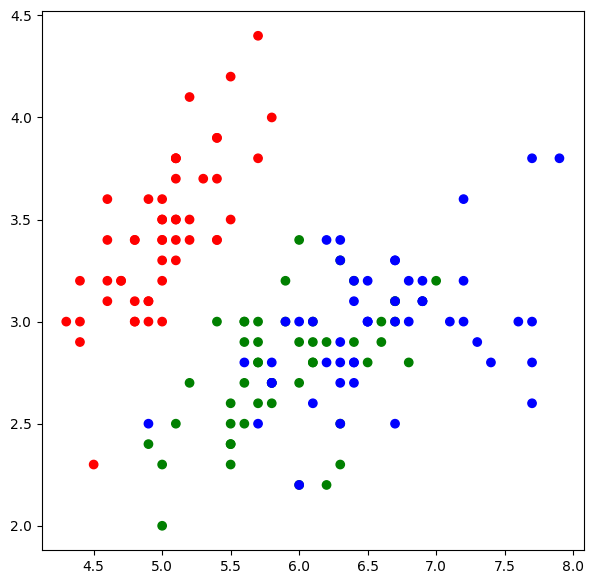

In [19]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [20]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [21]:
def knn(x_train, y_train, x_test, k):

    answers = []
    for x in x_test:
        test_distances = []

        for i in range(len(x_train)):

            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

def knn_weighted(x_train, y_train, x_test, k, a = 1, q = 0.5):
    answers = []
    for x in x_test:
        test_distances = []

        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])

            test_distances.append((distance, y_train[i]))

        classes = {class_item: 0 for class_item in set(y_train)}

        for d in sorted(test_distances)[0:k]:
            distance, label = d
            #weight = 1 / (distance + a)
            weight = q ** distance
            classes[d[1]] += weight

        answers.append(max(classes, key=classes.get))

    return answers

In [22]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_weighted(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

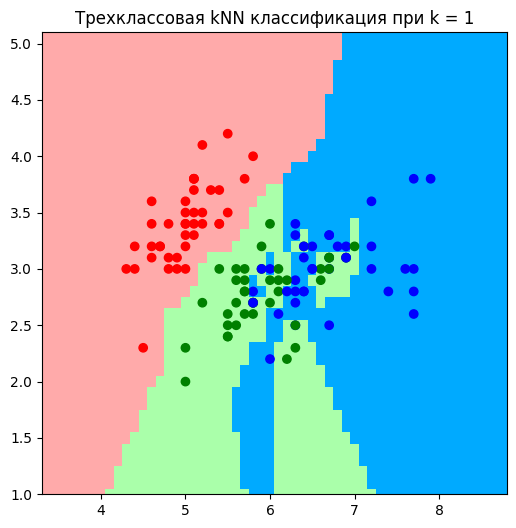

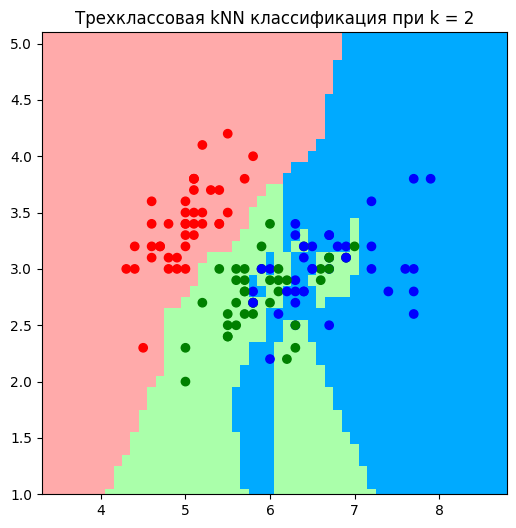

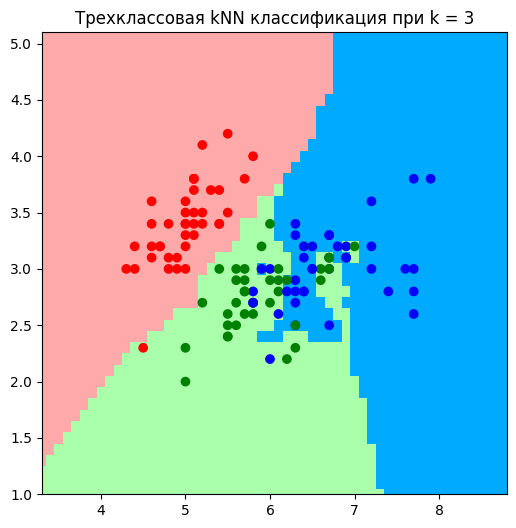

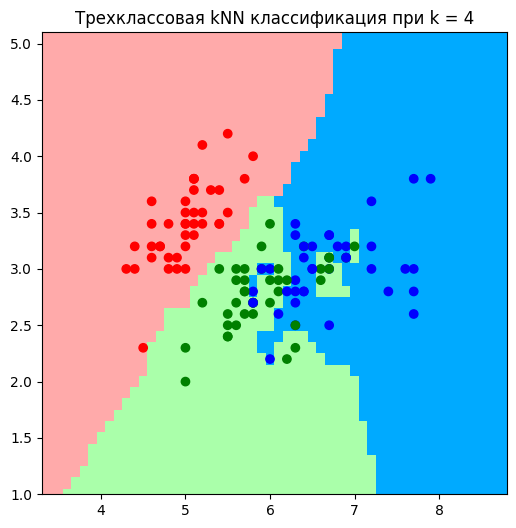

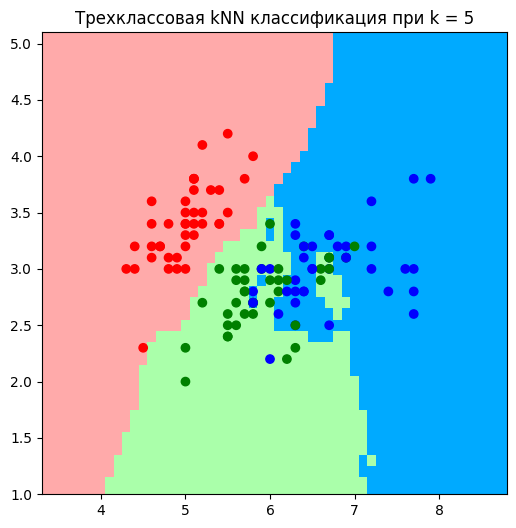

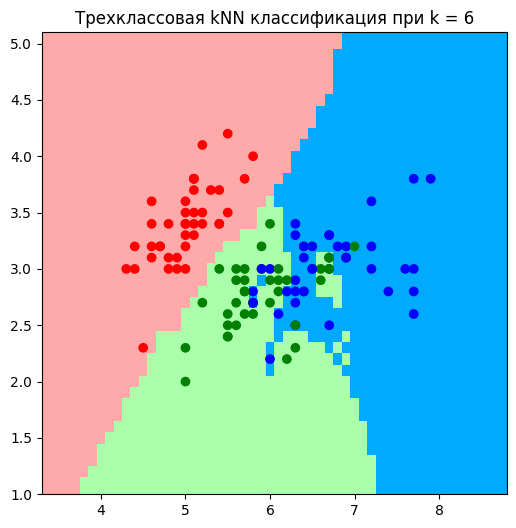

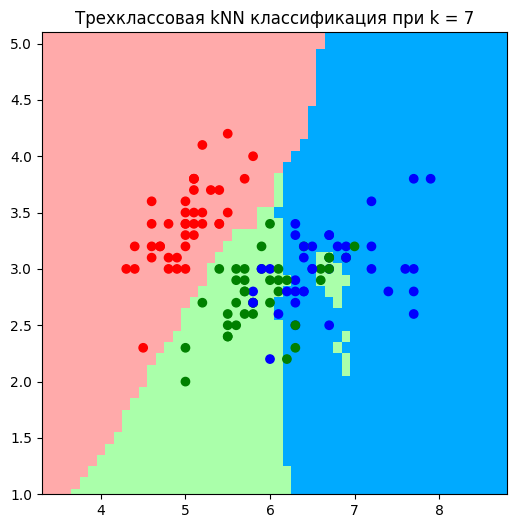

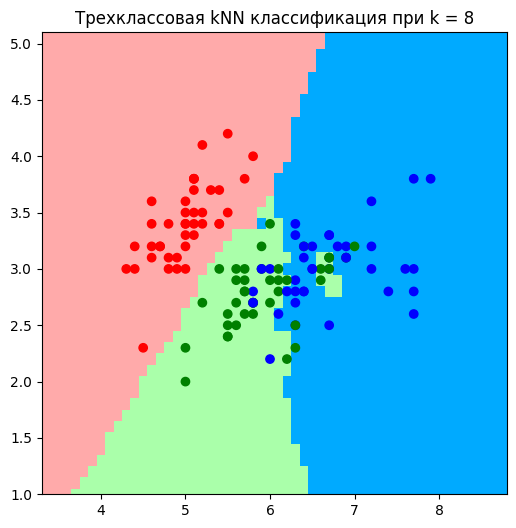

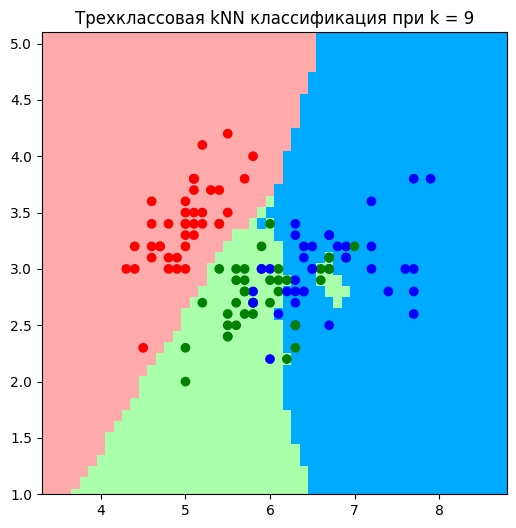

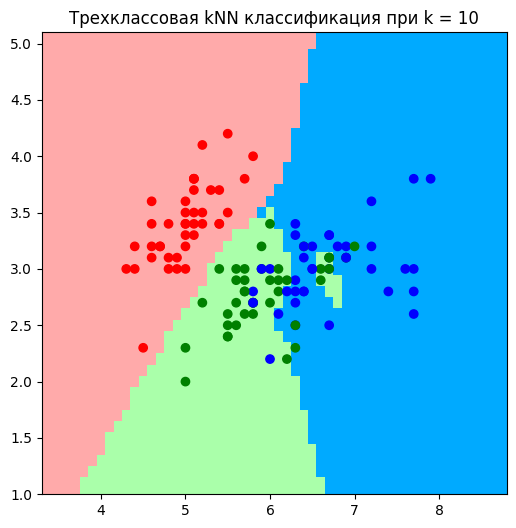

In [23]:
for k in range(1, 11):
    y_pred = knn_weighted(X_train, y_train, X_test, k)
    get_graph(X_train, y_train, k)

In [24]:
def MSD(x_train, y_train, x_test, k_values):
    msd_scores = []

    for k in k_values:
        predicted_labels = knn_weighted(x_train, y_train, x_test, k)

        total_msd = 0
        unique_labels = np.unique(predicted_labels)
        
        for label in unique_labels:
            cluster_points = x_test[predicted_labels == label]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
                distances = np.linalg.norm(cluster_points - centroid, axis=1)
                total_msd += np.mean(distances ** 2)

        msd_scores.append(total_msd / len(unique_labels))

    return msd_scores

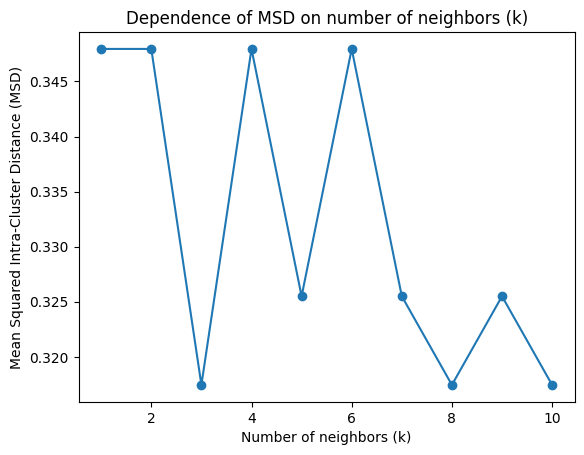

In [25]:
k_values = list(range(1, 11))
msd_values = MSD(X_train, y_train, X_test, k_values)

plt.plot(k_values, msd_values, marker='o')
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Mean Squared Intra-Cluster Distance (MSD)")
plt.title("Dependence of MSD on number of neighbors (k)")
plt.show()

2.	Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [26]:
def pca_svd(X, n_components):
    # Центрируем данные
    #X_centered = X - np.mean(X, axis=0)
    # Вычисляем сингулярное разложение
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Выбираем n_components главных компонент
    components = Vt[:n_components]
    
    # Проецируем данные на главные компоненты
    X_pca = X @ components.T
    
    return X_pca, components

In [27]:
X, y = load_iris(return_X_y=True)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

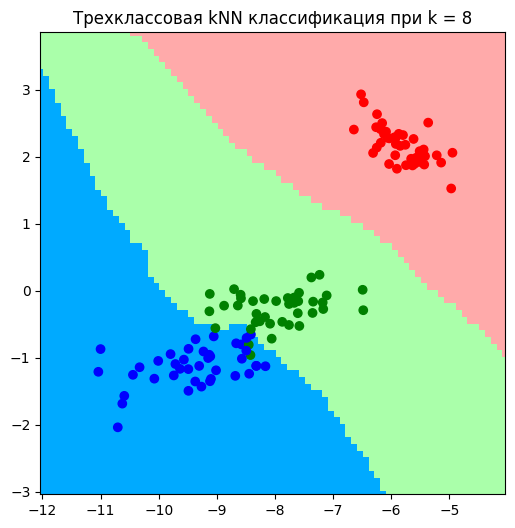

Предсказанные классы для тестовой выборки: [np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1)]
Реальные классы для тестовой выборки: [2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [29]:
n_components = 2
X_train_reduced, _ = pca_svd(X_train, n_components)
X_test_reduced, _ = pca_svd(X_test, n_components)

k = 8
get_graph(X_train_reduced, y_train, k)

predictions = knn_weighted(X_train_reduced, y_train, X_test_reduced, k)
print("Предсказанные классы для тестовой выборки:", predictions)
print("Реальные классы для тестовой выборки:", y_test)

comparison_array = (np.array(predictions) == y_test).astype(int)
print(comparison_array)